# Machine Learning with Scikit-Learn:<br>Introduction to Machine Learning
## Jake VanderPlas

In [1]:
# The code in these cells is runable. 
# Click on this cell, then press Shift+Enter to run it, 
# or click the Run button in the toolbar.

print("Hello, World!")

Hello, World!


This notebook will cover the basics of scikit-learn, a popular package containing a collection of tools for machine learning written in Python. See more at <a href="http://scikit-learn.org" target="_blank"><em>http://scikit-learn.org</em></a>.

# Outline

This first notebook in the series covers the basics of two key concepts:

- What is machine learning?
- How do you do basic machine learning in scikit-learn?

These provide the background required to understand the deeper dives into machine learning methods that we will see in later parts of this series.

By the end of this notebook, the viewer will:

- Have an intuitive understanding of the basic categories and tasks of machine learning.
- Understand the data layout expected in scikit-learn.
- Understand essential features of scikit-learn’s API and how they are used in the case of simple datasets.
- See one example of how these API features can be used together to gain insight from a more complicated dataset.

**Main Goal:** To introduce the central concepts of machine learning, and how they can be applied in Python using the scikit-learn package.

- Definition of machine learning
- Data representation in scikit-learn
- Introduction to the scikit-learn API

# What Is Machine Learning?

In this section, we will begin to explore the basic principles of machine learning.
Machine learning is about building programs with *tunable parameters* (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by *adapting to previously seen data.*

Machine learning can be considered a subfield of *artificial intelligence*, since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by *generalizing based on data* rather than just storing and retrieving data items
like a database system might do.

## Simple Machine Learning Example

In [2]:
# This call is required in notebooks to make figures appear within the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# lesson1.py is some code designed to keep this part of the discussion
# qualitative, rather than technical. Feel free to dig in if you're
# curious how these things are implemented! Uncomment the last line
# to see the source code.
import lesson1
# lesson1??

As a concrete example, consider this data: we have data with two numerical *features*, represented by the values of the x and y axes:

In [4]:
from lesson1 import labeled_data, unknown_data
labeled_data.head()

,feature1,feature2,color
0,1.66,3.56,0.0
1,1.61,0.40,1.0
2,0.28,4.84,0.0
3,0.91,4.55,0.0
4,2.16,1.28,1.0


If we visualize the data, it looks like this:

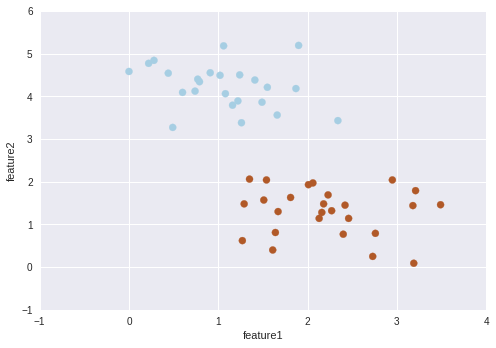

In [5]:
lesson1.plot_data(labeled_data);

If you were trying to create a model to let you distinguish between red and blue points, you might start by drawing a line between groups of points, maybe something like this:

In [6]:
from lesson1 import interactive_model
interactive_model

interactive(children=(FloatSlider(value=0.0, description='slope', max=1.0), FloatSlider(value=1.0, description='intercept', max=3.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

In [7]:
interactive_model.kwargs

{'intercept': 1.0, 'slope': 0.0}

Given this trained model, when you encounter some new, unknown data, you can use this line to label the new data:

In [8]:
unknown_data.head()

,feature1,feature2
0,1.65,0.92
1,1.43,4.38
2,0.35,3.45
3,0.67,4.04
4,1.79,2.01


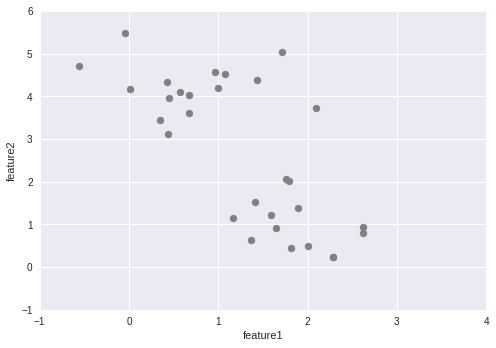

In [9]:
lesson1.plot_data(unknown_data);

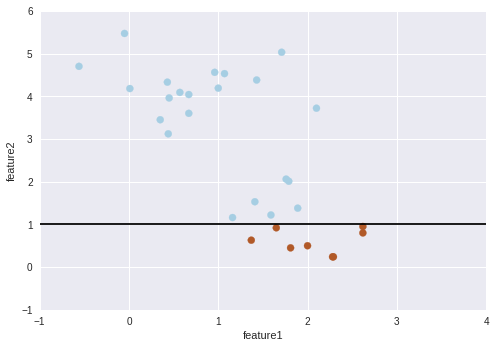

In [10]:
lesson1.plot_fit_model(unknown_data, **interactive_model.kwargs)

This example, in which we are predicting *discrete* labels from numerical features, is known as a *Classification* task.

Note the steps we went through (some implicitly):

1. Find some labeled *training data*.
2. Choose a model type (here, we implicitly chose "a straight line divides the classes").
3. Tune the model parameters until it fits the training data (i.e., adjust the slope and angle of the line).
4. Given this tuned model, make predictions on unknown data.

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model that can *generalize* to new
data: if you were to drop another point onto the plane that is unlabeled, this algorithm
could now *predict* whether it's a blue or a red point.

In machine learning, the "training" step that we did by hand (i.e., adjusting the model until it fits the training data) is done automatically based on one of a variety of algorithms.

For example, here's how the above procedure can be done automatically in scikit-learn:

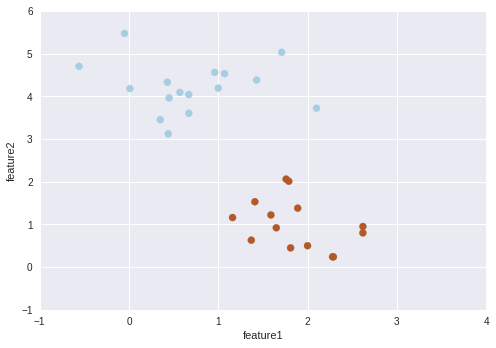

In [11]:
from sklearn.svm import LinearSVC

# 1. Format the training data
features = labeled_data[['feature1', 'feature2']]
labels = labeled_data['color']

# 2. Choose the model: here a linear support vector classifier
model = LinearSVC()

# 3. Fit the model parameters to labeled training data
model.fit(features, labels)

# 4. Predict the colors for the unknown data
features = unknown_data[['feature1', 'feature2']]
unknown_data['color'] = model.predict(features)

# Now we can visualize the results
lesson1.plot_data(unknown_data);

That is machine learning in a nutshell! In the remainder of this notebook, and the ones that follow it in the series, we will be diving into each of these steps in more detail. We will also talk about how to evaluate the effectiveness of your models.

# 1. Formatting and Representing Data

Machine learning is about creating models from data. For that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in Scikit-learn expect data to be stored in a
*two-dimensional array or matrix*.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- `n_samples`:  The number of samples: each sample is an item to process (e.g., classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- `n_features`:  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However, it can be very high dimensional
(e.g., millions of features), with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than NumPy arrays.

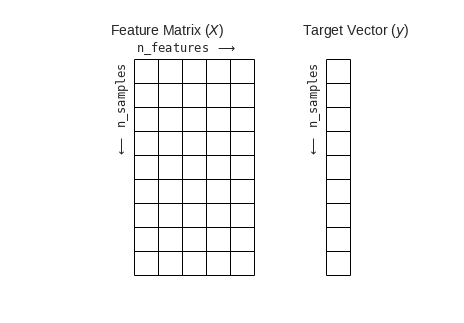

In [12]:
lesson1.data_layout_figure()

(Figure from the <a href="https://jakevdp.github.io/PythonDataScienceHandbook" target="_blank"><em>Python Data Science Handbook</em></a>)

As an example of a simple dataset, let's consider the task of classifying flowers by species.
A trained botanist can go out into the wild, find a flower, and determine the species of the flower by looking at various characteristics.

Can we train a machine learning model to do the same?

<img src='images/iris.jpg'>

The first step in machine learning is to map the real world objects onto an ``[n_samples, n_features]`` matrix of numerical features.
Some approaches you might use here include:

- Recording the color of each flower and particular points (e.g., reflectivity in red, green, or blue)
- Recording the size of particular flower features (e.g., length and width of petals, height of stalk, etc.)
- Using the photograph itself as data (e.g., pixel values in a 100x100 image of each flower)

Choosing the "best" features for a particular dataset can often be helped by domain expertise (in this case, consulting with a botanist).

Additionally, we will need some "ground truth" labels to work with. For example, we could ask an expert to classify several hundred flowers, and then train the algorithm with that training set.

The standard Iris dataset makes some straightforward choices for this. It uses the following:

**Features in the Iris dataset:**

  1. Sepal length in cm
  2. Sepal width in cm
  3. Petal length in cm
  4. Petal width in cm

**Target classes to predict:**

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
This data can be found in several places; I find the <a href="http://seaborn.pydata.org/" target="_blank">seaborn data fetcher</a> to be convenient:

In [13]:
import seaborn
iris = seaborn.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


When confronted with any dataset, it is often useful to start by visualizing it; here we'll use seaborn's <a href="http://seaborn.pydata.org/generated/seaborn.pairplot.html" target="_blank"><code>pairplot</code></a> functionality:

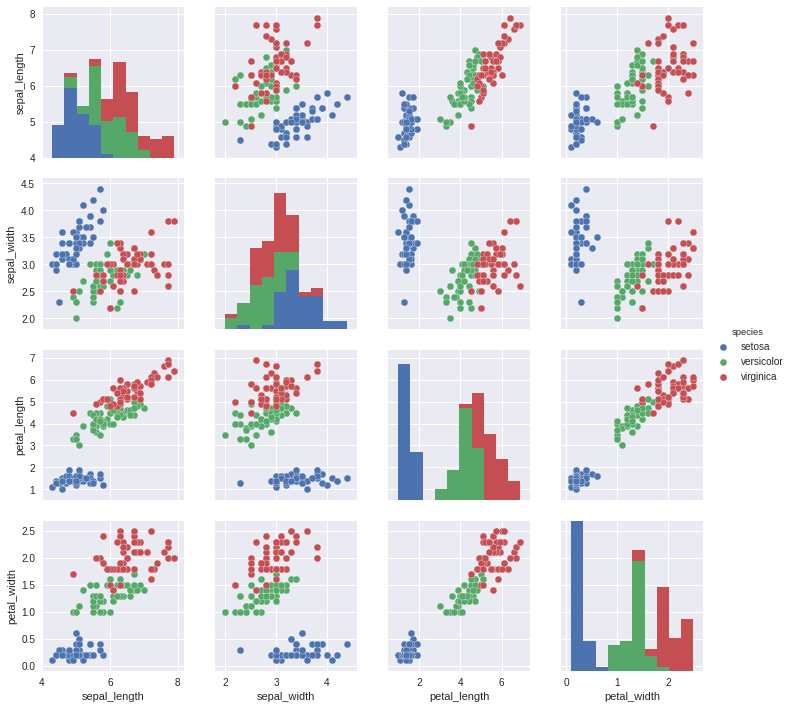

In [14]:
seaborn.pairplot(iris, hue='species');

Next, we must extract the features matrix and target vector from the data:

In [15]:
features = iris.drop('species', axis=1)
target = iris['species']

print(features.shape)
print(target.shape)

(150, 4)
(150,)


# 2. Choosing a Model

With your dataset in order, the next step is to choose a model for your data.
Part of the art of machine learning is developing the intuition for which model is appropriate where, but the process is decently summarized by this flowchart from the scikit-learn documentation:

<img src='images/sklearn_flowchart.png'>

(Interactive version available <a href="http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html" target="_blank">here</a>.)

If we follow the flowchart from "START" for this data, we land on the Linear SVC estimator (i.e., we have more than 50 samples, are predicting a category, have labeled data, and fewer than 100K samples).
To prepare this model, we import the model object from scikit-learn, and we instantiate the class:

In [16]:
from sklearn.svm import LinearSVC
model = LinearSVC()

All scikit-learn estimators are implemented as Python classes, and work in this way.

An important point is that you instantiate the class without reference to any data. This is equivalent to above when our model was "a line will fit the data", but we have not yet chosen the slope and intercept.

This model is poised and ready to be fed data.

# 3. Fitting the Model

To fit the model to training data, we call the ``fit()`` method. For classification tasks, the ``fit()`` method requires a feature matrix and a target vector, which we fortunately prepared earlier:

In [17]:
model.fit(features, target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Inspecting the model now can be useful, and we can do this with the Jupyter notebook's tab-completion features:

<img src='images/tab-completion.png' width=400>

In [18]:
# type "model." and then press the Tab key to see the list of options


For example, you find the value of model hyperparameters like ``fit_intercept``:

In [19]:
model.fit_intercept

True

In particular, any attribute that ends with an underscore, by convention, is fit from the data.
For example, here ``model.coef_`` is analogous to the slope and intercept in our simple model above:

In [20]:
model.coef_

array([[ 0.18424154,  0.4512269 , -0.80794563, -0.45071429],
       [ 0.04020794, -0.88000175,  0.42510715, -0.98625955],
       [-0.85073683, -0.98670026,  1.38096246,  1.86542489]])

At this point, you can treat the details as a black box; we'll discuss the idea behind SVM models in a later lesson (_Machine Learning with Scikit-Learn: Support Vector Machines_).

# 4. Predicting on New Data

Once a model is fit, you can use the ``predict()`` method to apply the model to new data.
For example, let's see how well the model recovers the labels of the training data:

In [21]:
predicted = model.predict(features)
predicted

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
    

In [22]:
(predicted == target).mean()

0.96666666666666667

Here our model is about 99% effective at recovering labels *for objects it has already seen*.
As we will see later, this is not a good indicator of how well it might perform for objects it has not yet seen, but we will come to that discussion in a later lesson (_Machine Learning with Scikit-Learn: Hyperparameters and Model Validation_).

This *accuracy* measure is important enough that scikit-learn provides a convenience routine to compute it:

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, target)

0.96666666666666667

## Estimator Interface: Summary

This is essentially what you need to know about scikit-learn estimators:

- Choosing the model is accomplished by instantiating an estimator class
- Fitting the data is done with the ``fit()`` method
- Predicting labels for new data is done with the ``predict()`` method

A benefit of scikit-learn's interface is that new models can be dropped in without changing code! For example, we can try several different models with the same code:

In [24]:
model = LinearSVC()
model.fit(features, target)
predicted = model.predict(features)
print(model.__class__.__name__, (predicted == target).mean())

LinearSVC 0.966666666667


By simply changing the model class you use, you can reuse the same code with vastly different models.
For example, you might try each of the following models:

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

model = LinearSVC()  # Change this!

model.fit(features, target)
predicted = model.predict(features)
print(model.__class__.__name__, (predicted == target).mean())

LinearSVC 0.966666666667


You can even write a loop to do this all at once:

In [26]:
for Model in [LinearSVC, RandomForestClassifier, LogisticRegression,
              GaussianNB, KNeighborsClassifier]:
    model = Model()
    model.fit(features, target)
    predicted = model.predict(features)
    print(model.__class__.__name__, (predicted == target).mean())

LinearSVC 0.966666666667
RandomForestClassifier 0.993333333333
LogisticRegression 0.96
GaussianNB 0.96
KNeighborsClassifier 0.966666666667


Again, we are predicting labels for data the models have already seen, so these numbers are not particularly useful in evaluating model effectiveness, but we will return to that later.

# Other Categories of Machine Learning

So far we have focused on a particular type of task: predicting discrete labels. This is known as *Classification*, which is a subcategory of **supervised learning**. Here are other categorizations of machine learning you should become familiar with:

- **Supervised learning**: Using *labeled* training data to predict new labels on unlabeled data

  - *Classification*: Labels are discrete categories
  - *Regression*: Labels are continuous quantities
  
  
- **Unsupervised learning**: Using *unlabeled* training data to model relationship within the data

   - *Clustering*: Identifying groups of similar data
   - *Dimensionality Reduction*: Identifying a small number of features or combinations of features that are sufficient to describe the dataset
   - *Density Estimation*: Predicting the probability that an object is consistent with the training data
   
In all these cases, the scikit-learn estimator syntax is similar.

# Quick Application: Optical Character Recognition

To demonstrate the above principles on a more interesting problem, let's consider OCR (Optical Character Recognition)—that is, recognizing hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use scikit-learn's set of preformatted digits, which is built into the library.

## Loading and Visualizing the Digits Data

We'll use scikit-learn's data access interface to take a look at this data:

In [27]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

Let's plot a few of these:

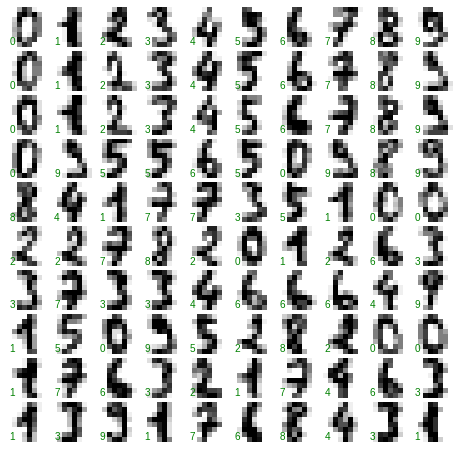

In [28]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Here, the data is simply each pixel value within an 8x8 grid:

In [29]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


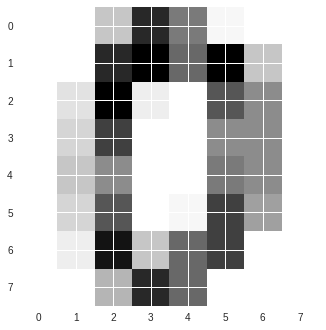

In [30]:
plt.imshow(digits.images[0])

In [31]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [32]:
# The target label
print(digits.target)

[0 1 2 ..., 8 9 8]


So our dataset has 1797 samples in 64 dimensions.

## Unsupervised Learning: Dimensionality Reduction

When confronted with a new dataset, it is useful to visualize it in order to gain intuition about the nature of the data.
We could attempt to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in 64 dimensions!

Instead we'll reduce the dimensions using an unsupervised method; we'll make use of a manifold learning algorithm called *Isomap* to transform the data to two dimensions.

Again, the goal here is to identify a small number of features or combinations of features that are sufficient to describe the dataset.

In [33]:
from sklearn.manifold import Isomap

In [34]:
iso = Isomap(n_components=2)
iso.fit(digits.data)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In place of the ``predict()`` method of supervised estimators, dimensionality reduction estimators have a ``transform`` method:

In [35]:
data_projected = iso.transform(digits.data)

The result is a dataset with two features that suitably describe the dataset:

In [36]:
data_projected.shape

(1797, 2)

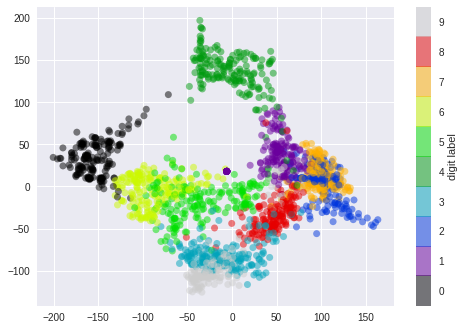

In [37]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. Let's give it a try.

## Classification on Digits

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample; this lets us see how the classification might fare on data that it has not been trained on:

In [38]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


Let's use a ``LinearSVC`` classifier, as we did above:

In [39]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.93777777777777782

This single number doesn't tell us where we've gone wrong: one nice way to discover this is to use the *confusion matrix*.

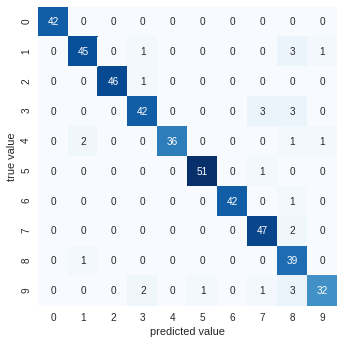

In [41]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)

seaborn.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

We might also take a look at some of the outputs along with their predicted labels. We'll make the bad labels red:

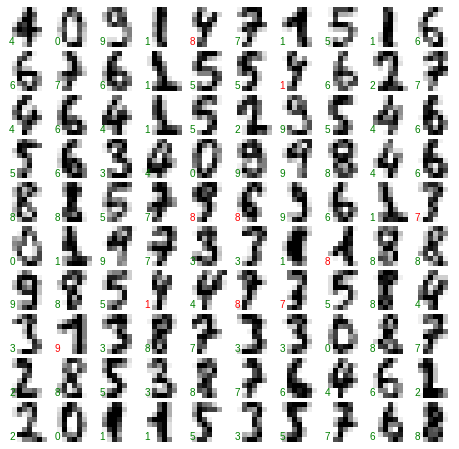

In [42]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!

You might also be interested in trying a few of the other classifiers mentioned above, to see if any of them do a better job with their classification.

In [43]:
# Try it here!


# Summary

In this notebook, we have covered the essential features of the scikit-learn data representation and the estimator API.
Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds.
Armed with this information about the estimator API, you can explore the scikit-learn documentation and start trying out various models on your data.